In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse


In [2]:
df = pd.read_csv("./data/banks_telegram_posts_data.csv")

In [3]:
# Convert the 'Post Hour' column to string format
df['post_time'] = df['post_time'].astype(str)

In [4]:
df.head()

,post_link,date,views,post_time,bank,time_of_day
0,https://t.me/tikvahethiopia/70382,2022-05-19T13:47:14+00:00,310300,13:47:14,#CBE,afternoon
1,https://t.me/tikvahethiopia/70383,2022-05-19T13:47:14+00:00,310300,13:47:14,#CBE,afternoon
2,https://t.me/tikvahethiopia/73378,2022-08-30T11:13:05+00:00,267400,11:13:05,#CBE,morning
3,https://t.me/tikvahethiopia/73379,2022-08-30T11:13:05+00:00,267400,11:13:05,#CBE,morning
4,https://t.me/tikvahethiopia/74556,2022-11-03T16:07:35+00:00,347100,16:07:35,#CBE,afternoon


In [5]:
# Assessing Missing Values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
post_link      0
date           1
views          0
post_time      0
bank           0
time_of_day    1
dtype: int64


In [6]:
# Remove "#" symbol from "bank" column
df["bank"] = df["bank"].str.replace("#", "")

In [7]:
# Remove rows with missing values
df.dropna(inplace=True)

In [8]:
# Check for data inconsistency in the "views" column
inconsistent_data = df[~df["views"].astype(str).str.isdigit() | (df["views"] <= 0)]

# Print the rows with inconsistent data
if len(inconsistent_data) > 0:
    print("Inconsistent data found:")
    print(inconsistent_data)
else:
    print("No inconsistent data found.")

No inconsistent data found.


In [9]:
# Define the regular expression pattern for date format
date_pattern = r"\d{4}-\d{2}-\d{2}"

# Check for data inconsistency in the "date" column
inconsistent_data = df[~df["date"].astype(str).str.match(date_pattern)]

# Print the rows with inconsistent data
if len(inconsistent_data) > 0:
    print("Inconsistent data found:")
    print(inconsistent_data)
else:
    print("No inconsistent data found.")

Inconsistent data found:
                             post_link             date   views post_time  \
136  https://t.me/tikvahethiopia/81734   9/26/2023 0:00  239800  10:18:00   
137  https://t.me/tikvahethiopia/81606   9/19/2023 0:00  258400   6:53:00   
138  https://t.me/tikvahethiopia/81502   9/15/2023 0:00  269400   3:56:00   
139  https://t.me/tikvahethiopia/81338    9/8/2023 0:00  219400  10:50:00   
140  https://t.me/tikvahethiopia/81252    9/5/2023 0:00  255900   1:19:00   
141  https://t.me/tikvahethiopia/81165    9/1/2023 0:00  259100  10:20:00   
142  https://t.me/tikvahethiopia/81123   8/29/2023 0:00  232100   9:02:00   
143  https://t.me/tikvahethiopia/76814    3/5/2023 0:00  244100   9:32:00   
144  https://t.me/tikvahethiopia/76089   1/26/2023 0:00  129400   9:49:00   
145  https://t.me/tikvahethiopia/76075   1/25/2023 0:00  299100  11:38:00   
146  https://t.me/tikvahethiopia/68651   3/17/2022 0:00  249700   4:43:00   
147  https://t.me/tikvahethiopia/68259    3/3/2022 

In [10]:
# Convert the date column to the desired format
df['date'] = df['date'].apply(lambda x: parse(x).strftime('%Y-%m-%d'))

In [11]:
# Checking Data Integrity
valid_urls = df['post_link'].str.startswith('https://t.me/tikvahethiopia/').all()
print("Valid URLs:", valid_urls)

non_negative_views = (df['views'] >= 0).all()
print("Non-negative Views:", non_negative_views)

Valid URLs: True
Non-negative Views: True


In [12]:
# Checking Data Duplicates
duplicates = df.duplicated().sum()
print("Duplicate Records:", duplicates)


Duplicate Records: 0


In [13]:
# Data Range Validation
view_range_valid = (df['views'] >= 0) & (df['views'] <= 1000000)
print("View Range Validation:")
print(view_range_valid)

View Range Validation:
0      True
1      True
2      True
3      True
4      True
       ... 
152    True
153    True
154    True
155    True
156    True
Name: views, Length: 156, dtype: bool


# Time-based Analysis

In [15]:

df['Date'] = pd.to_datetime(df['date'])
df['Weekday'] = df['date'].dt.weekday
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year
print(df.head())
# Group data by year and calculate the total views
yearly_views = df.groupby('Year')['views'].sum()

# Create a line chart
plt.plot(yearly_views.index, yearly_views.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Views')
plt.title('Total Views by Year')
plt.grid(True)
plt.show()



AttributeError: Can only use .dt accessor with datetimelike values

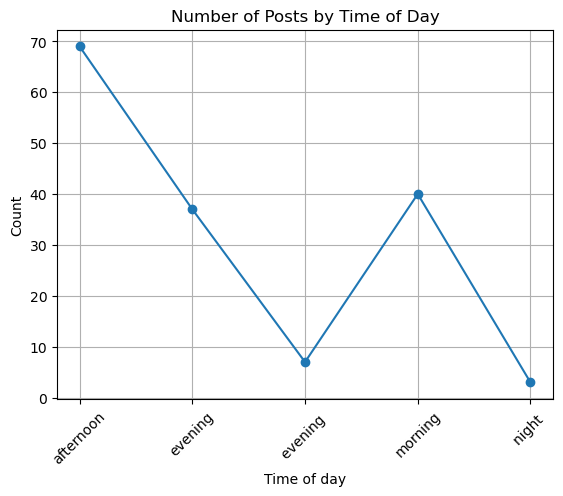

In [16]:
# Grouping and Aggregation
grouped_by_time = df['time_of_day'].value_counts().sort_index()

# Create a time series chart
plt.plot(grouped_by_time.index, grouped_by_time.values, marker='o')
plt.xlabel('Time of day')
plt.ylabel('Count')
plt.title('Number of Posts by Time of Day')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Bivariate Analysis

<Axes: xlabel='date'>

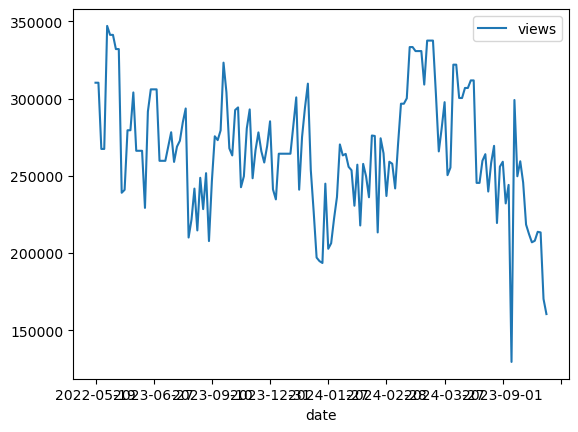

In [17]:

# Date vs. View
date_vs_view = df[['date', 'views']]
date_vs_view.plot(x='date', y='views', kind='line')


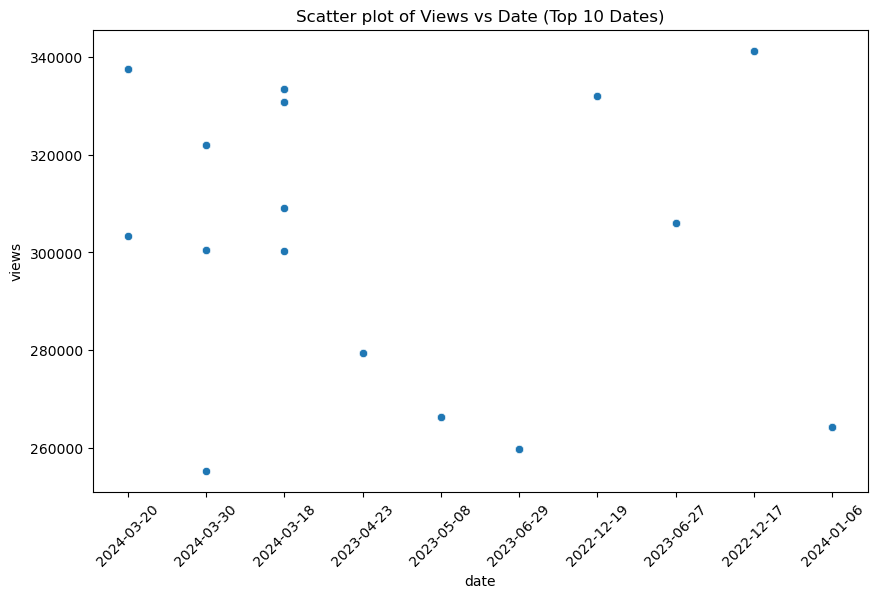

In [29]:
# Calculate the top 10 most frequent dates
top_10_dates = df['date'].value_counts().nlargest(10).index

# Filter the dataframe to include only the top 10 dates
filtered_df = df[df['date'].isin(top_10_dates)]

# Bivariate Analysis  Scatter plot between "views" and "date"
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x="date", y="views")
plt.xticks(rotation=45)
plt.title("Scatter plot of Views vs Date (Top 10 Dates)")
plt.show()

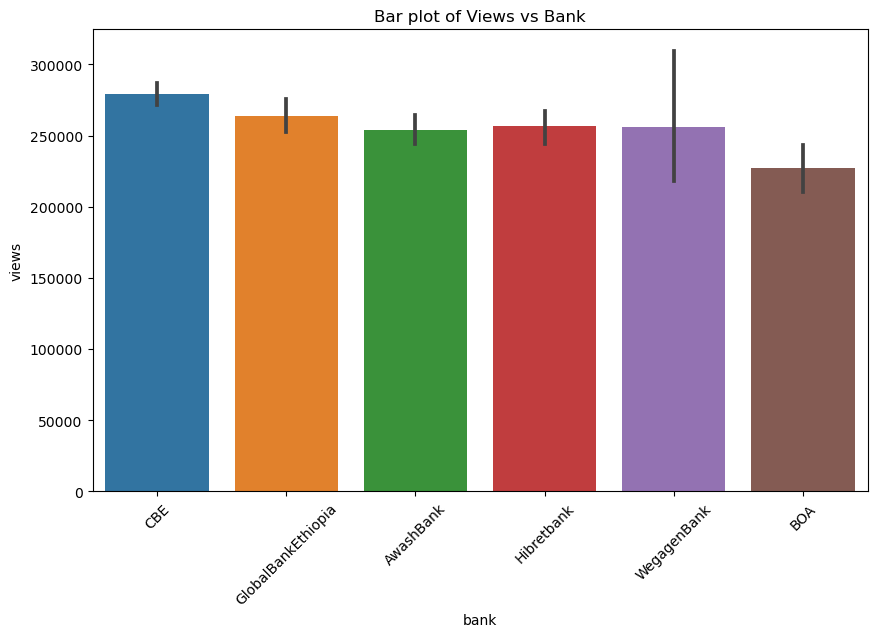

In [19]:
# Bivariate Analysis 2: Bar plot between "bank" and "views"
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="bank", y="views")
plt.xticks(rotation=45)
plt.title("Bar plot of Views vs Bank")
plt.show()

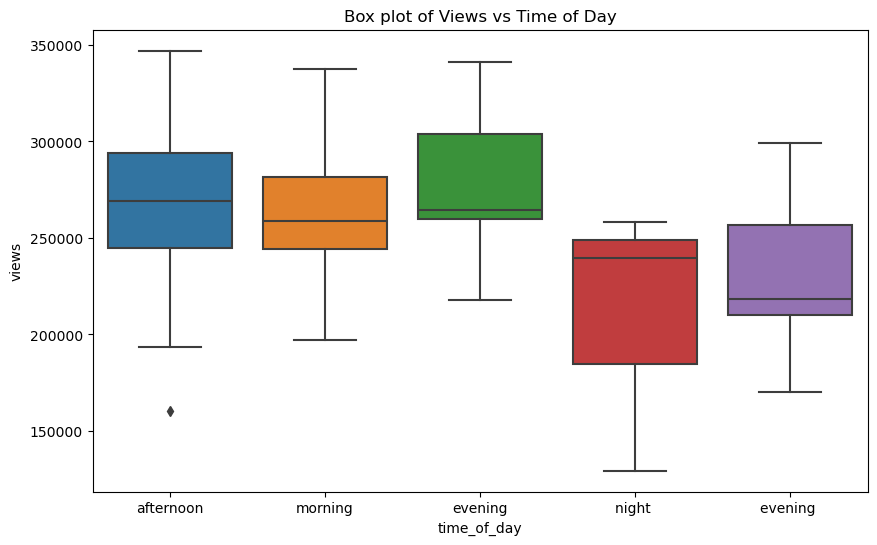

In [20]:
# Bivariate Analysis 3: Box plot between "time_of_day" and "views"
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="time_of_day", y="views")
plt.title("Box plot of Views vs Time of Day")
plt.show()

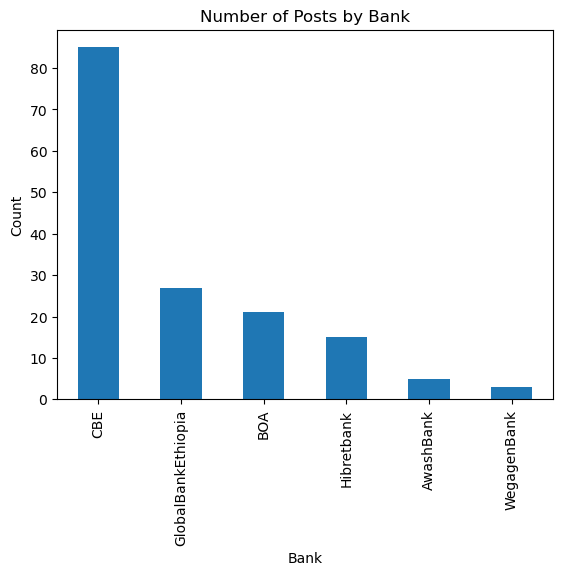

In [31]:


# Perform EDA on "bank" column
bank_counts = df["bank"].value_counts()
bank_counts.plot(kind="bar")
plt.title("Number of Posts by Bank")
plt.xlabel("Bank")
plt.ylabel("Count")
plt.show()



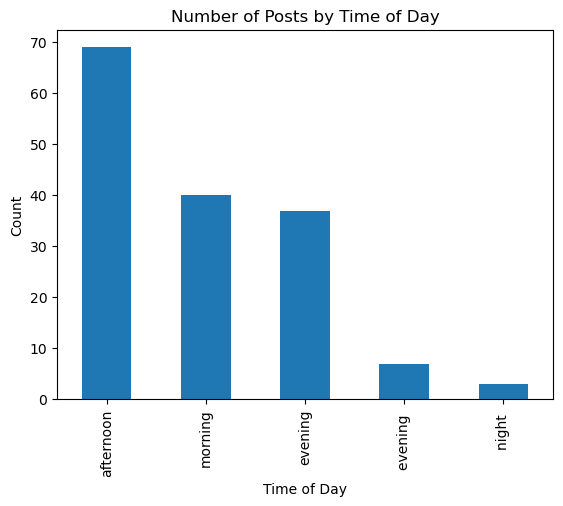

In [32]:
# Perform EDA on "time_of_day" column
time_of_day_counts = df["time_of_day"].value_counts()
time_of_day_counts.plot(kind="bar")
plt.title("Number of Posts by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.show()

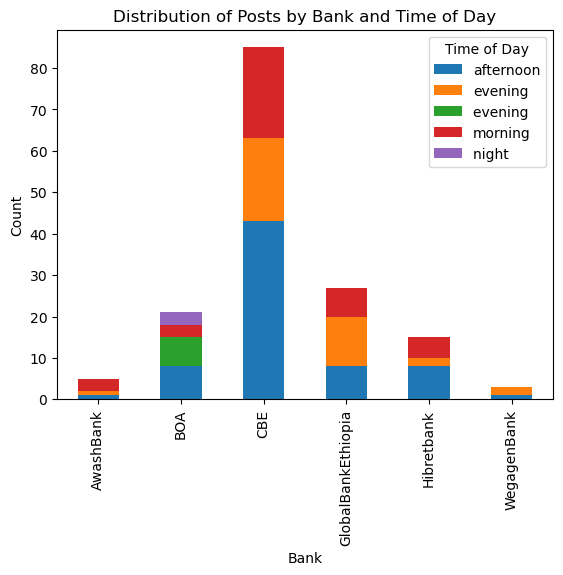

In [34]:
# Create a cross-tabulation between "bank" and "time_of_day"
cross_tab = pd.crosstab(df["bank"], df["time_of_day"])

# Create a stacked bar plot
stacked_bar = cross_tab.plot(kind="bar", stacked=True)
plt.title("Distribution of Posts by Bank and Time of Day")
plt.xlabel("Bank")
plt.ylabel("Count")
plt.legend(title="Time of Day")
plt.show()

c:\Users\huawei\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


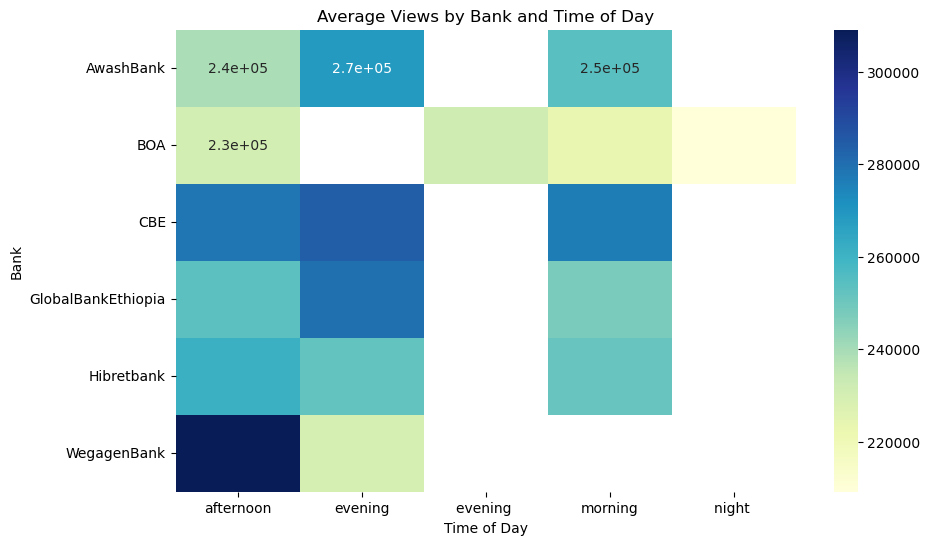

In [37]:


# Group the data by "bank" and "time_of_day" and calculate the average views
average_views = df.groupby(["bank", "time_of_day"])["views"].mean().unstack()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(average_views, annot=True, cmap="YlGnBu")
plt.title("Average Views by Bank and Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Bank")
plt.show()

In [21]:
# Calculate the mean post time
mean_post_time = df.groupby("post_time")["views"].mean().reset_index()

# Select the most frequent 6 post times
top_6_post_times = mean_post_time["post_time"].value_counts().nlargest(6).index

# Filter the data for the top 6 post times
filtered_data = df[df["post_time"].isin(top_6_post_times)]

c:\Users\huawei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\huawei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


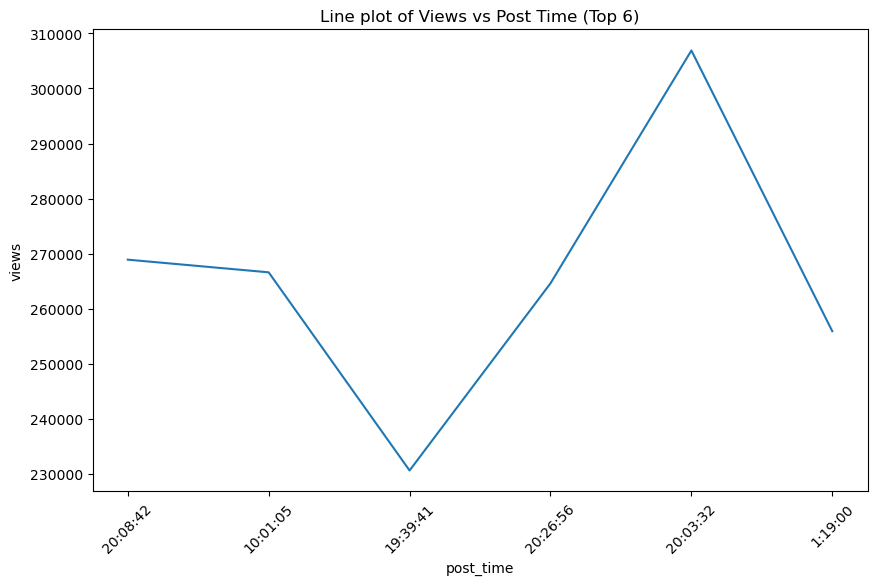

In [22]:
# Line plot between "post_time" and "views" for the top 6 post times
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data, x="post_time", y="views")
plt.xticks(rotation=45)
plt.title("Line plot of Views vs Post Time (Top 6)")
plt.show()

# Data Comparison

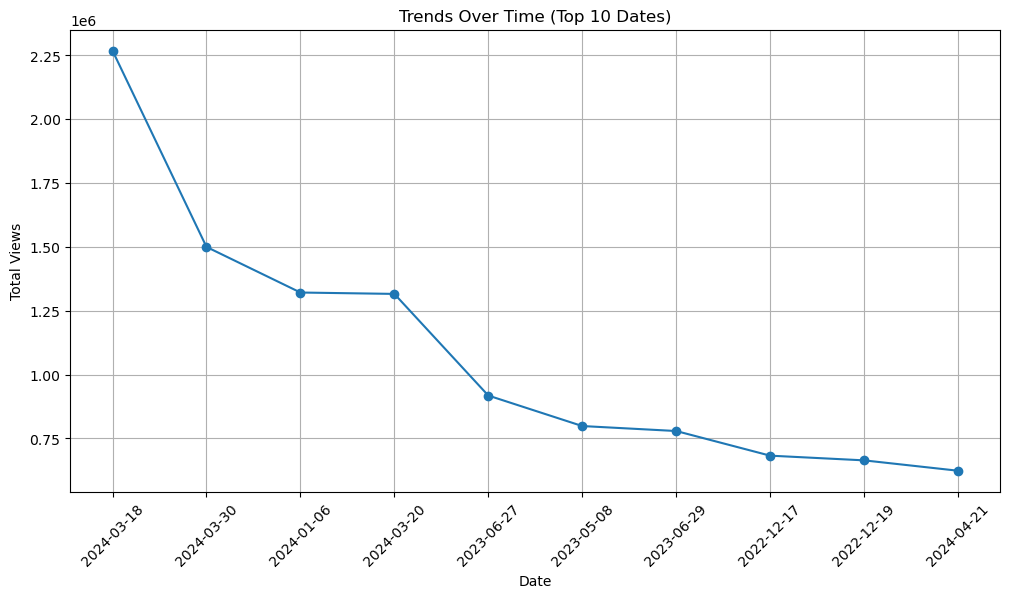

In [28]:
# Calculate total views per date
views_per_date = df.groupby('date')['views'].sum()
top_10_dates = views_per_date.nlargest(10)

# Plot trends for the top 10 dates
plt.figure(figsize=(12, 6))
plt.plot(top_10_dates.index, top_10_dates.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Total Views')
plt.title('Trends Over Time (Top 10 Dates)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

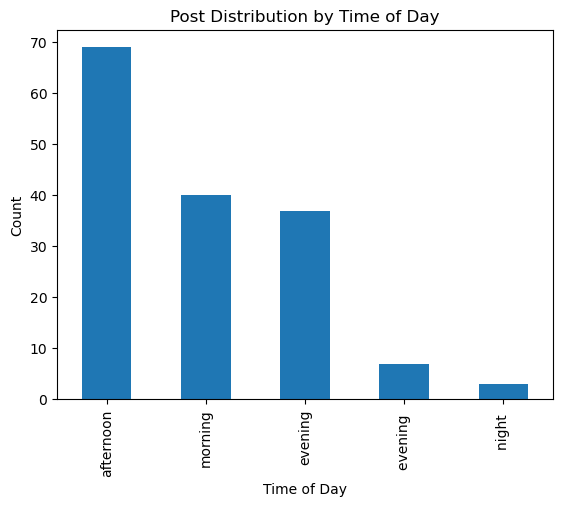

In [24]:
df['time_of_day'].value_counts().plot(kind='bar')
plt.title('Post Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()

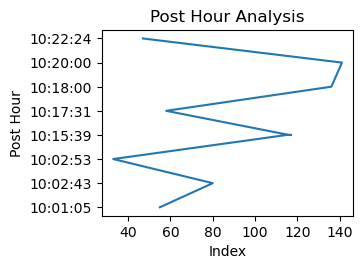

In [25]:
# Sort the 'Post Hour' column in ascending order
df.sort_values(by='post_time', inplace=True)

# Extract the first ten data points of the 'Post Hour' column
post_hour = df['post_time'].head(10)
view = df['views']

# Create the first chart - Line chart for 'Post Hour'
plt.subplot(2, 2, 1)
plt.plot(post_hour)
plt.xlabel('Index')
plt.ylabel('Post Hour')
plt.title('Post Hour Analysis')

# Adjust the layout and display the chart
plt.tight_layout()
plt.show()